In [35]:
from dotenv import load_dotenv
from paperweave.graph.extraction_and_intro import init_and_intro_graph

load_dotenv()

True

# Extract the paper and generate the sections we want to cover for the paper

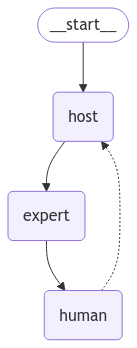

In [37]:
# interaction graph
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
from paperweave.graph.utterance_and_interaction import get_utterance_graph

interaction_graph = get_utterance_graph()

display(
    Image(
        interaction_graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [44]:
from langgraph.types import Command
import pprint
import json
import os

# Define the init_state and invoke the graph as done previously
init_state = {"podcast": {"paper": {"code": "1706.03762"}}}
# Define the filename using the code from the init_state
code = init_state["podcast"]["paper"]["code"]
filename = f"{code}.json"

# Check if the file already exists
if not os.path.exists(filename):
    # Write info_state to a JSON file with the filename derived from the code
    info_state = init_and_intro_graph().invoke(init_state, {"recursion_limit": 100})
    with open(filename, 'w') as file:
        json.dump(info_state, file)
else:
    with open(filename, 'r') as file:
        info_state = json.load(file)


config = {"configurable": {"thread_id": "paperweave_demo"}}


def get_last_utterance(chunk):
    return list(chunk.values())[0]['podcast']['transcript'][-1]


for chunk in interaction_graph.stream(info_state, config=config):
    if '__interrupt__' in chunk.keys():
        human_input = input()
        interaction_graph.invoke(Command(resume=human_input), config=config)
    else:
        utterance = get_last_utterance(chunk)
        if type(utterance) is dict:
            pprint.pprint(f"{utterance['persona']['name']}: {utterance['speach']}")

('Jimmy: What were the initial motivations behind developing the Transformer '
 'model, especially when traditional models were already performing well?')
0
('Mike: The motivation behind developing the Transformer model was mainly '
 'driven by a couple of significant limitations seen in the traditional '
 'sequence-to-sequence models, particularly those relying on recurrent neural '
 'networks (RNNs) or even convolutional neural networks (CNNs). \n'
 '\n'
 'One major concern was the sequential nature of RNNs. These models process '
 'input data in a time-dependent manner, which makes it challenging to '
 'parallelize the computation during training. As sequences grow longer, this '
 'sequential computation becomes a bottleneck, causing increased training '
 'times. The researchers wanted to devise a model that could handle long-range '
 'dependencies without being constrained by this sequential processing. \n'
 '\n'
 'Another key motivation was the performance of attention mechanisms 

KeyError: 'podcast'